In [55]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('heart-failure-prediction')
jovian.set_colab_id('1xbt7p66S9an4WMbaOxPlfZgdU7VarCpv')

# heart-failure-prediction

Use the "Run" button to execute the code.

In [56]:
!pip install jovian --upgrade --quiet

In [57]:
import jovian

In [58]:
# Execute this to save new versions of the notebook
jovian.commit(project="heart-failure-prediction")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/victoradejumo2/heart-failure-prediction


'https://jovian.ai/victoradejumo2/heart-failure-prediction'

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Heart Failure Prediction

####Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
####Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

####This project is to make a machine learning model to make early detection for CVDs to save peoples lives.

####Some of the features used will include:

####  - Age, Gender, Blood Pressure, Diabetes, Ejection Fraction, Smoke etc



####Data

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


For DEATH_EVENT column,
Death == 1
Alive == 0

In [62]:
data.shape

(299, 13)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [64]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [65]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Explanatory Data Analysis

Total No of living cases:  203
Total No of : death cases:  96


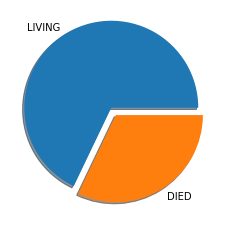

In [66]:
#Data distribution for death cases
len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_death = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING', 'DIED']
print("Total No of living cases: ", len_live)
print("Total No of : death cases: ", len_death)

plt.pie(arr, labels=labels, explode=[0.1,0.0], shadow=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


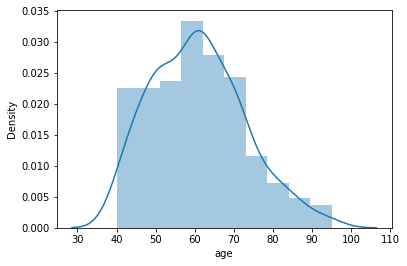

In [67]:
#age distribution

sns.distplot(data['age'])
plt.show()

Total No of living cases:  167
Total No of : death cases:  85


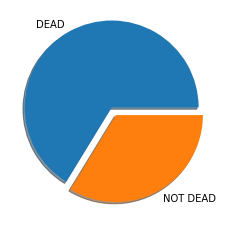

In [68]:
#Selecting rows of 50 years and above to show dead or not 

above_50_notdead = data["DEATH_EVENT"][data.age >= 50][data.DEATH_EVENT == 0]
above_50_dead = data["DEATH_EVENT"][data.age >= 50][data.DEATH_EVENT == 1]

len_not_dead = len(above_50_notdead)
len_dead = len(above_50_dead)

arr1 = [len_not_dead, len_dead]
labels = ["DEAD", "NOT DEAD"]
print("Total No of living cases: ", len_not_dead)
print("Total No of : death cases: ", len_dead)

plt.pie(arr1, labels=labels, explode=[0.1,0.0], shadow=True)
plt.show()

Total No of living cases:  85
Total No of : death cases:  40


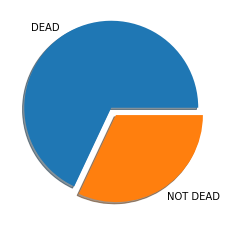

In [69]:
above_50_notdead = data["DEATH_EVENT"][data.diabetes == 1][data.DEATH_EVENT == 0]
above_50_dead = data["DEATH_EVENT"][data.diabetes == 1][data.DEATH_EVENT == 1]

len_not_dead = len(above_50_notdead)
len_dead = len(above_50_dead)

arr1 = [len_not_dead, len_dead]
labels = ["DEAD", "NOT DEAD"]
print("Total No of living cases: ", len_not_dead)
print("Total No of : death cases: ", len_dead)

plt.pie(arr1, labels=labels, explode=[0.1,0.0], shadow=True)
plt.show()

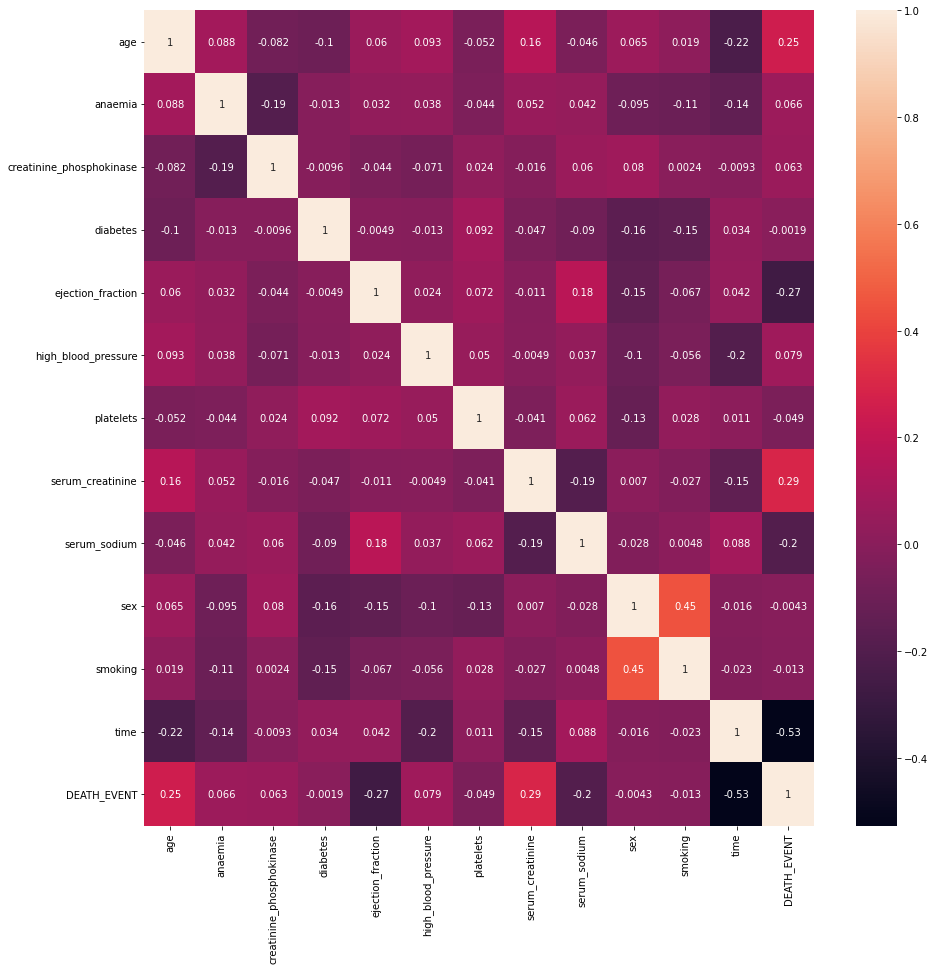

In [70]:
# checking the Correlation of the variables

corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

#####Correlation is between -1 to +1

In [71]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#Data Training

In [72]:
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (209, 12)
Shape of X_test:  (90, 12)
Shape of y_train:  (209,)
Shape of y_test:  (90,)


#Feature Engineering

In [73]:
def add_interaction(X):
    feature = X.columns
    m = len(feature)
    X_int = X.copy(deep=True)

    for i in range(m):
        feature_i_name = feature[i]
        feature_i_data = X[feature_i_name]

        for j in range(i + 1, m):
           feature_j_name = feature[j]
           feature_j_data = X[feature_j_name]
           feature_i_j_name = feature_i_name+" x "+feature_j_name
           X_int[feature_i_j_name] = feature_i_data * feature_j_data
    
    return X_int

X_train_mod = add_interaction(X_train)
X_test_mod = add_interaction(X_test)

#Model Building

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    '''
    Function for evaluating the model
    '''
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Confusin Matrix: ", confusion_matrix(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))

In [75]:
#building logistic regression model as the baseline model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

In [76]:
y_pred = lr.predict(X_test)
evaluating_model(y_test, y_pred)

Accuracy Score:  0.7888888888888889
Confusin Matrix:  [[58  4]
 [15 13]]
Precision Score:  0.7647058823529411
Recall Score:  0.4642857142857143


In [77]:
# building Standard Scaler with Logistic Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_pip.fit(X_train, y_train)

lr_pip_pred = lr_pip.predict(X_test)
evaluating_model(y_test, lr_pip_pred)

Accuracy Score:  0.8111111111111111
Confusin Matrix:  [[58  4]
 [13 15]]
Precision Score:  0.7894736842105263
Recall Score:  0.5357142857142857


In [78]:
#Using Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [79]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
svc = SVC(C=10, gamma=0.0001)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
evaluating_model(y_test, y_pred2)

Accuracy Score:  0.6777777777777778
Confusin Matrix:  [[59  3]
 [26  2]]
Precision Score:  0.4
Recall Score:  0.07142857142857142


In [84]:
#Using Deciision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Traning score: {:.3F}".format(best_score))
    y_pred3 = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred3)
    print("Test score: {:.3F}".format(accuracy))

    return best_model

randomized_search(params={'criterion': ['entropy', 'gini'],
                          'splitter': ['random', 'best'],
                          'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.1, 0.15, 0.2],
                          'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features': ['auto', 0.95, 0.9, 0.85, 0.8, 0.75, 0.7],
                          'max_depth': [None, 2, 4, 6, 8],
                          'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                          })


Traning score: 0.847
Test score: 0.756


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=0.75, max_leaf_nodes=25,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0075, presort='deprecated',
                       random_state=2, splitter='best')

In [87]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                                min_impurity_decrease=0.05, min_samples_leaf=0.02,
                                min_samples_split=10, min_weight_fraction_leaf=0.005,
                                random_state=2, splitter='random')
ds_clf.fit(X_train, y_train)
y_pred4 = ds_clf.predict(X_test)
evaluating_model(y_test, y_pred4)

Accuracy Score:  0.8111111111111111
Confusin Matrix:  [[55  7]
 [10 18]]
Precision Score:  0.72
Recall Score:  0.6428571428571429


In [86]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
                          'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1, 0.15, 0.2],
                          'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth': [None, 2, 4, 6, 8, 10, 20],
                          }, clf=RandomForestClassifier(random_state=2))

Traning score: 0.847
Test score: 0.867


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [88]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5, min_impurity_decrease=0.01, min_samples_leaf=10, random_state=2)
rf_clf.fit(X_train, y_train)
y_pred5 = rf_clf.predict(X_test)
evaluating_model(y_test, y_pred5)

Accuracy Score:  0.8666666666666667
Confusin Matrix:  [[60  2]
 [10 18]]
Precision Score:  0.9
Recall Score:  0.6428571428571429


In [100]:
#XGBoost
from xgboost import XGBClassifier

xgb1 = XGBClassifier(colsample_bytree=1, learning_rate=0.1,
                     max_depth=4,
                     n_estimators=400,
                     subsample=1)

eval_set = [(X_train, y_train)]
xgb1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.635042
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.587583
[2]	validation_0-logloss:0.544076
[3]	validation_0-logloss:0.507975
[4]	validation_0-logloss:0.47626
[5]	validation_0-logloss:0.449701
[6]	validation_0-logloss:0.42566
[7]	validation_0-logloss:0.402449
[8]	validation_0-logloss:0.382089
[9]	validation_0-logloss:0.363549
[10]	validation_0-logloss:0.348121
[11]	validation_0-logloss:0.332649
[12]	validation_0-logloss:0.318897
[13]	validation_0-logloss:0.306165
[14]	validation_0-logloss:0.294509
[15]	validation_0-logloss:0.28197
[16]	validation_0-logloss:0.270911
[17]	validation_0-logloss:0.260966
[18]	validation_0-logloss:0.251237
[19]	validation_0-logloss:0.241522
[20]	validation_0-logloss:0.234594
[21]	validation_0-logloss:0.227092
[22]	validation_0-logloss:0.219604
[23]	validation_0-logloss:0.213739
[24]	validation_0-logloss:0.207934
[25]	validation_0-logloss:0.20171
[26]	validation_0-logloss:0.196882
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [101]:
y_pred6 = xgb1.predict(X_test)
evaluating_model(y_test, y_pred6)

Accuracy Score:  0.8666666666666667
Confusin Matrix:  [[56  6]
 [ 6 22]]
Precision Score:  0.7857142857142857
Recall Score:  0.7857142857142857


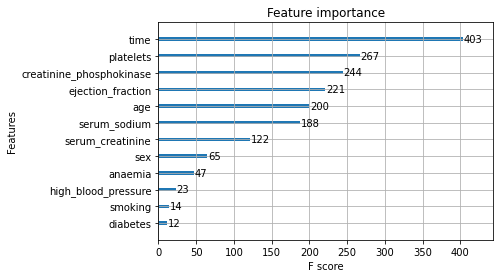

In [102]:
from xgboost import plot_importance

plot_importance(xgb1)
plt.show()

In [104]:
#Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier

gbst = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1)
gbst.fit(X_train, y_train)

gbst_pred = gbst.predict(X_test)
evaluating_model(y_test, gbst_pred)

Accuracy Score:  0.8555555555555555
Confusin Matrix:  [[59  3]
 [10 18]]
Precision Score:  0.8571428571428571
Recall Score:  0.6428571428571429


Choosing the best model

In [106]:
#XGBoost has the highest accuracy

import joblib
joblib.dump(xgb1, 'model_i.pkl')
model = joblib.load('model_i.pkl')
model.predict(X_test)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])